## Default Data: Classification Analysis
Predicting Default class

### Loading Libraries


In [ ]:
#pip install auto-sklearn

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from plotnine import * 
import seaborn as sns

# importing scipy
from scipy.stats import chi2_contingency

### Loading the df Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving default.csv to default.csv


In [ ]:
# Reading the df Dataset
df = pd.read_csv('default.csv')

### Descriptive Analytics


In [ ]:
# first five rows
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [ ]:
# default Distribution
df.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [ ]:
# last few rows
df.tail()

,default,student,balance,income
9995,No,No,711.555020,52992.37891
9996,No,No,757.962918,19660.72177
9997,No,No,845.411989,58636.15698
9998,No,No,1569.009053,36669.11236
9999,No,Yes,200.922183,16862.95232


In [ ]:
# dataset infor
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [ ]:
# Unique Values
df.nunique()

default        2
student        2
balance     9502
income     10000
dtype: int64

In [ ]:
# describe for summary stats
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


## Graphical Summaries

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


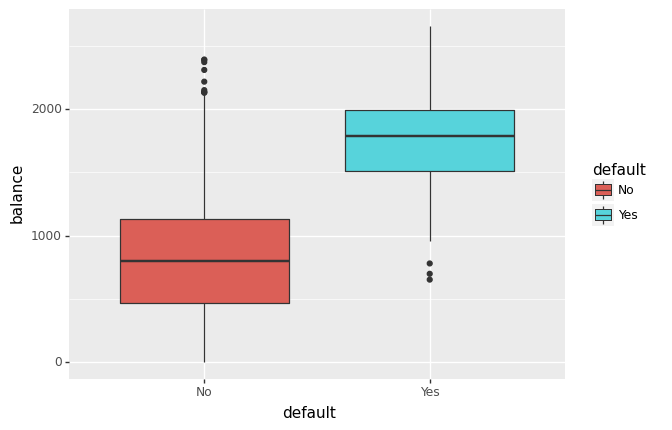

<ggplot: (8748053339865)>

In [ ]:
# Boxplot of balance vs default
ggplot(df, aes(x = 'default', y = 'balance', fill = 'default')) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


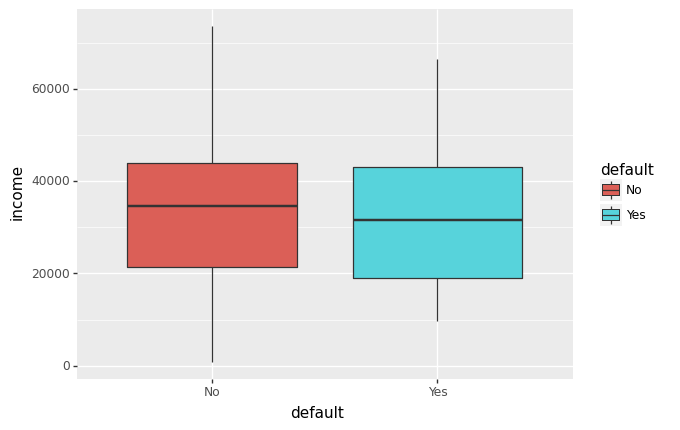

<ggplot: (8748011049545)>

In [ ]:
# Boxplot of balance vs default
ggplot(df, aes(x = 'default', y = 'income', fill = 'default')) + geom_boxplot()

In [ ]:
# correlation Matrix
df.corr()

,balance,income
balance,1.000000,-0.152243
income,-0.152243,1.000000


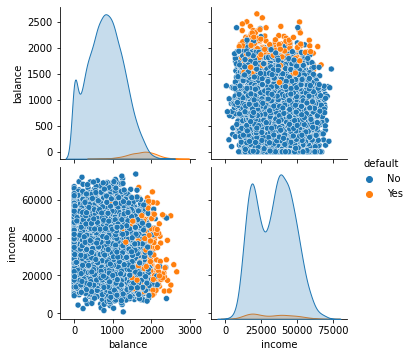

In [ ]:
# scatterplot matrix
sns.pairplot(df, diag_kind= 'kde', hue = 'default')

In [ ]:
# chi Square test
for col in ['student']: 
  crosstab = pd.crosstab(df[col], df['default'], margins = True)
  stat, p_value, dof, expected = chi2_contingency(crosstab)
  print('P_value of Chi_Square Test between Default and ', col, p_value )

P_value of Chi_Square Test between Default and  student 0.013720363230633343


## Predictive analysis: Choosing predictors


In [ ]:
# recoding price
df.default = np.where(df.default == 'Yes', 1, 0)

In [ ]:
# choosing predictors
predictors = ['student', 'balance']

In [ ]:
# Target variable
target = 'default'

In [ ]:
# creating dummy variables
X = pd.get_dummies(df[predictors], drop_first= True)
X.head()

,balance,student_Yes
0,729.526495,0
1,817.180407,1
2,1073.549164,0
3,529.250605,0
4,785.655883,0


In [ ]:
# Target variable 
y = df[target]
y[0:5]


0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

In [ ]:
# Target variable 
y = df[target]
y[0:4]


0    0
1    0
2    0
3    0
Name: default, dtype: int64

In [ ]:
# Target variable 
y = df[target]
y[0:3]


0    0
1    0
2    0
Name: default, dtype: int64

In [ ]:
# Target variable 
y = df[target]
y[0:2]


0    0
1    0
Name: default, dtype: int64

In [ ]:
# Target variable 
y = df[target]
y[0:1]


0    0
Name: default, dtype: int64

## Predictive Analytics: Creating Training and Testing Datasets 

In [ ]:
# creating train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val, = train_test_split(X,y, test_size = 0.2, random_state = 123, stratify = y)

In [ ]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
# Frequency before oversampling
y_train.value_counts()

0    7734
1     266
Name: default, dtype: int64

In [ ]:
# Oversampling 
sm = SMOTE(sampling_strategy= 0.5, random_state = 123)
X_train, y_train = sm.fit_resample(x_train, y_train)


In [ ]:
# Frequency after oversampling
y_train.value_counts() 

0    7734
1    3867
Name: default, dtype: int64

In [ ]:
# train.info
x_train.head()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 1548 to 8732
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   balance      8000 non-null   float64
 1   student_Yes  8000 non-null   uint8  
dtypes: float64(1), uint8(1)
memory usage: 132.8 KB


In [ ]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 3802 to 2194
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   balance      2000 non-null   float64
 1   student_Yes  2000 non-null   uint8  
dtypes: float64(1), uint8(1)
memory usage: 33.2 KB


In [ ]:
y_train.head()

0    1
1    0
2    0
3    0
4    0
Name: default, dtype: int64

In [ ]:
y_val.head()

3802    0
9617    0
1316    0
9377    0
8489    1
Name: default, dtype: int64

In [ ]:
# standardizing the predictors
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_val_std = sc.transform(x_val)

In [ ]:
StandardScaler()

StandardScaler()

In [ ]:
x_train_std[0:5]

array([[ 1.44020966, -0.64803573],
       [ 2.13135302,  1.5431248 ],
       [ 0.17388365, -0.64803573],
       [ 0.48971179, -0.64803573],
       [ 0.6876792 , -0.64803573]])

In [ ]:
x_train_std[0:4]

array([[ 1.44020966, -0.64803573],
       [ 2.13135302,  1.5431248 ],
       [ 0.17388365, -0.64803573],
       [ 0.48971179, -0.64803573]])

In [ ]:
x_train_std[0:3]

array([[ 1.44020966, -0.64803573],
       [ 2.13135302,  1.5431248 ],
       [ 0.17388365, -0.64803573]])

In [ ]:
x_train_std[0:2]

array([[ 1.44020966, -0.64803573],
       [ 2.13135302,  1.5431248 ]])

In [ ]:
x_train_std[0:1]

array([[ 1.44020966, -0.64803573]])

## Logistic regression model


In [ ]:
# import the libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
# logistic model
model = LogisticRegression()

In [ ]:
# train the model 
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Prediction
y_pred = model.predict(x_val)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(x_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0.000000,0.023816,1.000000,4.109498,4.466458,4.679414,9.514033,10.905799,12.912350,15.153793,...,2125.792202,2133.464209,2134.015627,2145.607674,2179.221428,2247.421889,2269.946966,2370.463612,2387.314867,2415.316994
0.000000,1784,0,149,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.023816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.000000,18,0,49,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.109498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.466458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247.421889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2269.946966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2370.463612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2387.314867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,1784,149
1,18,49


In [ ]:
# evaluation scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))

Accuracy 0.9165
Recall 0.7313432835820896
Precision 0.2474747474747475
F1 Score 0.369811320754717


## ROC Curve

In [ ]:
# Extracting probabilities 
probs = pd.Series(model.predict_proba(x_val)[:, 1])
probs

0       0.003118
1       0.007669
2       0.000331
3       0.000145
4       0.369221
          ...   
1995    0.051152
1996    0.000395
1997    0.009495
1998    0.001316
1999    0.647420
Length: 2000, dtype: float64

In [ ]:
# import roc metrics
from sklearn.metrics import roc_curve, roc_auc_score


Text(0, 0.5, 'TPR or Sensitivity')

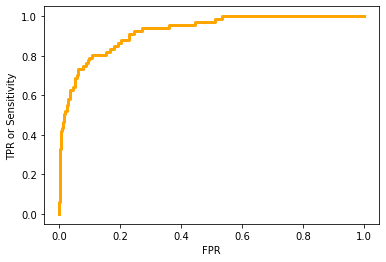

In [ ]:
# roc curve 
fpr, tpr, _= roc_curve(y_val, probs)
plt.plot(fpr, tpr, color = 'orange', lw = 3)
plt.xlabel('FPR')
plt.ylabel('TPR or Sensitivity')

In [ ]:
# AUC: higher the better
roc_auc_score(y_val,probs)

0.925913628958158

## Crossvalidation Classification

In [ ]:
# standardizing the predictors
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [ ]:
from sklearn.utils import shuffle
# crossvalidation 
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(test_size = 0.2, n_splits= 10, random_state= 123)
scores = cross_val_score(model, X_std, y, cv = shuffle_split, scoring = 'f1')
print(scores)
print('Mean f1 Scores', scores.mean())

[0.46315789 0.35294118 0.36363636 0.46464646 0.47311828 0.34408602
 0.4952381  0.44897959 0.43298969 0.5       ]
Mean f1 Scores 0.4338793578362007


## Cross Validation Decision Trees

In [54]:
#crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 10, scoring = 'neg_root_mean_squared_error')
print(scores *-1)
print('Mean RMSE', scores.mean()*-1)

[0.16733201 0.14491377 0.17029386 0.15165751 0.16733201 0.17029386
 0.16733201 0.16124515 0.14832397 0.17606817]
Mean RMSE 0.1624792312906373


## Random Forest

In [70]:
# importing random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 1000, random_state = 123)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=123)

In [71]:
# prediction
y_pred = model.predict(x_val)

In [75]:
# confusion matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,1751,182
1,28,39


In [74]:
# evaluation scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))

Accuracy 0.895
Recall 0.582089552238806
Precision 0.17647058823529413
F1 Score 0.2708333333333333


Text(0.5, 0, 'Random Forest: Feature Importance')

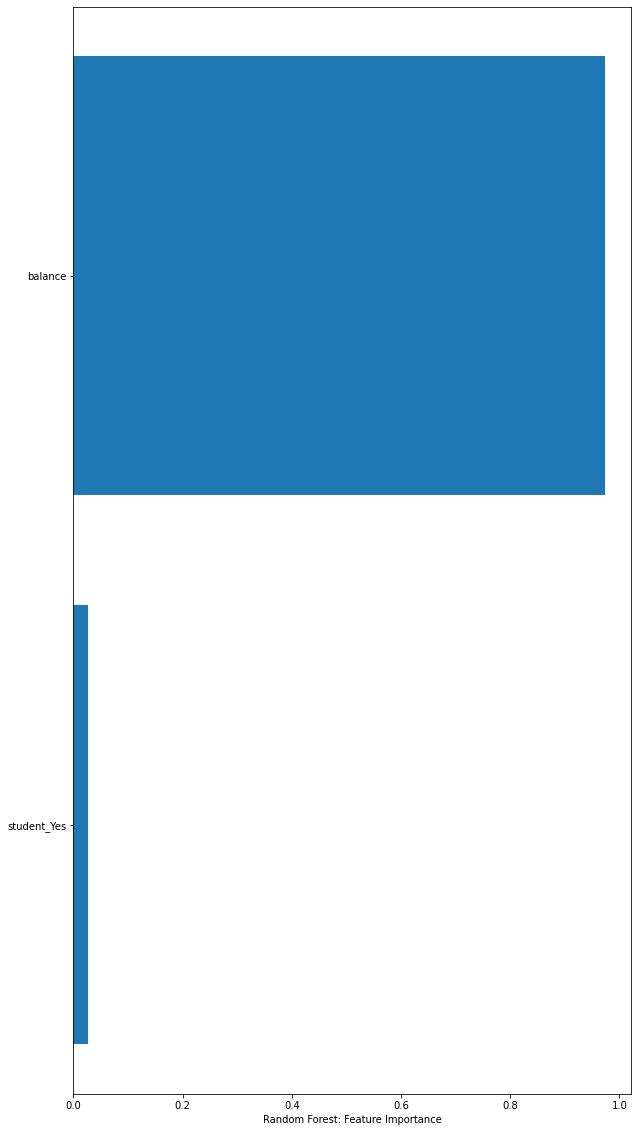

In [77]:
from IPython.core.pylabtools import figsize
# Variable importance score
plt.figure(figsize=(10,20))
sorted_idx = model.feature_importances_.argsort()
plt.barh(X.columns[0:][sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest: Feature Importance")

## XG BOOST

In [66]:
# importing XG boost
import xgboost as xgb

In [80]:
# train model
model = xgb.XGBClassifier(objective='reg:squarederror', random_state = 123, learning_rate = 0.15, 
                         n_estimators=1000, max_depth = 3)
model.fit(X_train, y_train) 

XGBClassifier(learning_rate=0.15, n_estimators=1000,
              objective='reg:squarederror', random_state=123)

In [81]:
# predicting 
y_pred = model.predict(x_val)

In [83]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,1787,146
1,23,44


In [84]:
# Evaluation Scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))


Accuracy 0.9155
Recall 0.6567164179104478
Precision 0.23157894736842105
F1 Score 0.3424124513618677


## Auto-Sklearn

In [85]:
# Importing sklearn
import autosklearn
from autosklearn.regression import AutoSklearnRegressor

In [88]:
from autosklearn.estimators import AutoSklearnClassifier
import joblib
# define model
TIME_BUDGET = 60*2
model = AutoSklearnClassifier(
    time_left_for_this_task= TIME_BUDGET,
    metric = autosklearn.metrics.root_mean_squared_error,
    n_jobs= -1,
    resampling_strategy='cv',
    resampling_strategy_arguments= {'folds': 5}
)

In [89]:
# train model
model.fit(X_train, y_train)

AutoSklearnClassifier(metric=root_mean_squared_error, n_jobs=-1,
                      per_run_time_limit=24, resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 5},
                      time_left_for_this_task=120)

In [ ]:
# predicting 
y_pred = model.predict(x_val)

In [90]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,0,1
0,1787,146
1,23,44


In [91]:
# Evaluation Scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))


Accuracy 0.9155
Recall 0.6567164179104478
Precision 0.23157894736842105
F1 Score 0.3424124513618677


In [92]:
# model summary
print(model.sprint_statistics())

auto-sklearn results:
  Dataset name: a211157e-1419-11ed-80b2-0242ac1c0002
  Metric: root_mean_squared_error
  Best validation score: 0.316487
  Number of target algorithm runs: 12
  Number of successful target algorithm runs: 7
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 5
  Number of target algorithms that exceeded the memory limit: 0



In [93]:
# Leaderboard
print(model.leaderboard())

          rank  ensemble_weight                 type      cost   duration
model_id                                                                 
7            1             0.76                  lda  0.316487   7.728256
13           2             0.02        decision_tree  0.331642   7.008149
11           3             0.04          gaussian_nb  0.335659   7.578910
6            4             0.18  k_nearest_neighbors  0.546021  14.789344
